# MDSynthesis + distributed + nglview

> A match made in the seventh circle.
    
                            ~ Dante

Today I'm going to show off some of the most useful tools I've been playing/working with in recent months. We'll use MDSynthesis for gathering up existing datasets, but that library isn't necessary to use either of the other tools: **``distributed``** and **``nglview``**.

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import mdsynthesis as mds

First, we gather up a Bundle of wild DIMS simulations (NapA, inward-to-outward transitions). Note that this will only work on our infrastructure but should work even if for you the Sims are read-only:

In [7]:
b = mds.discover('/nfs/homes4/dldotson/Projects/Transporters/NapA/SYSTEMS/DIMS/dims/S1/in2out/fitted/')
b = b.flatten()
b = mds.Bundle(sorted(b))

In [8]:
b

<Bundle([<Sim: 'NapA_S1_i2o_10'>, <Sim: 'NapA_S1_i2o_11'>, <Sim: 'NapA_S1_i2o_12'>, <Sim: 'NapA_S1_i2o_13'>, <Sim: 'NapA_S1_i2o_14'>, <Sim: 'NapA_S1_i2o_15'>, <Sim: 'NapA_S1_i2o_16'>, <Sim: 'NapA_S1_i2o_17'>, <Sim: 'NapA_S1_i2o_18'>, <Sim: 'NapA_S1_i2o_19'>, <Sim: 'NapA_S1_i2o_1'>, <Sim: 'NapA_S1_i2o_20'>, <Sim: 'NapA_S1_i2o_21'>, <Sim: 'NapA_S1_i2o_22'>, <Sim: 'NapA_S1_i2o_23'>, <Sim: 'NapA_S1_i2o_2'>, <Sim: 'NapA_S1_i2o_24'>, <Sim: 'NapA_S1_i2o_25'>, <Sim: 'NapA_S1_i2o_26'>, <Sim: 'NapA_S1_i2o_27'>, <Sim: 'NapA_S1_i2o_28'>, <Sim: 'NapA_S1_i2o_29'>, <Sim: 'NapA_S1_i2o_30'>, <Sim: 'NapA_S1_i2o_31'>, <Sim: 'NapA_S1_i2o_32'>, <Sim: 'NapA_S1_i2o_33'>, <Sim: 'NapA_S1_i2o_34'>, <Sim: 'NapA_S1_i2o_35'>, <Sim: 'NapA_S1_i2o_36'>, <Sim: 'NapA_S1_i2o_3'>, <Sim: 'NapA_S1_i2o_37'>, <Sim: 'NapA_S1_i2o_38'>, <Sim: 'NapA_S1_i2o_39'>, <Sim: 'NapA_S1_i2o_40'>, <Sim: 'NapA_S1_i2o_41'>, <Sim: 'NapA_S1_i2o_42'>, <Sim: 'NapA_S1_i2o_43'>, <Sim: 'NapA_S1_i2o_44'>, <Sim: 'NapA_S1_i2o_45'>, <Sim: 'NapA_S1_i2o_

In [9]:
len(b)

150

## Visualization of molecular trajectories with ``nglview``

From the ``nglview`` docs:

> An IPython/Jupyter widget to interactively view molecular structures and trajectories. Utilizes the embeddable NGL Viewer for rendering. Support for showing data from the file-system, RCSB PDB, simpletraj and from objects of analysis libraries mdtraj, pytraj, mdanalysis.

Since we have a Bundle of DIMS simulations at the ready, we can have a look at some of them. We can make an ``nglview`` widget directly from an MDAnalysis Universe:

In [11]:
import nglview

In [12]:
s = b[0]

In [13]:
s

<Sim: 'NapA_S1_i2o_10'>

In [14]:
s.universe

<Universe with 11748 atoms and 11842 bonds>

In [18]:
wg = nglview.show_mdanalysis(s.universe)

/usr/local/lib/python2.7/dist-packages/ipywidgets/widgets/widget.py:157: DeprecationWarning: Widget._keys_default is deprecated: use @default decorator instead.
  def _keys_default(self):
/usr/local/lib/python2.7/dist-packages/ipywidgets/widgets/widget.py:157: DeprecationWarning: Widget._keys_default is deprecated: use @default decorator instead.
  def _keys_default(self):
/usr/local/lib/python2.7/dist-packages/ipykernel/comm/comm.py:52: DeprecationWarning: Comm._comm_id_default is deprecated: use @default decorator instead.
  def _comm_id_default(self):
/usr/local/lib/python2.7/dist-packages/ipykernel/comm/comm.py:29: DeprecationWarning: Comm._iopub_socket_default is deprecated: use @default decorator instead.
  def _iopub_socket_default(self):
/usr/local/lib/python2.7/dist-packages/ipykernel/comm/comm.py:24: DeprecationWarning: Comm._kernel_default is deprecated: use @default decorator instead.
  def _kernel_default(self):
/usr/local/lib/python2.7/dist-packages/ipykernel/comm/comm.py

In [21]:
wg

By feeding in the full universe, we've fed in all the atoms in the system. We probably only care about a subset, though, and we can get better performance if we feed in an AtomGroup of the subset of atoms we actually want to look at:

In [23]:
wg = nglview.show_mdanalysis(s.universe.select_atoms('protein and name CA'))

/usr/local/lib/python2.7/dist-packages/ipywidgets/widgets/widget.py:157: DeprecationWarning: Widget._keys_default is deprecated: use @default decorator instead.
  def _keys_default(self):
/usr/local/lib/python2.7/dist-packages/ipywidgets/widgets/widget.py:157: DeprecationWarning: Widget._keys_default is deprecated: use @default decorator instead.
  def _keys_default(self):
/usr/local/lib/python2.7/dist-packages/ipykernel/comm/comm.py:52: DeprecationWarning: Comm._comm_id_default is deprecated: use @default decorator instead.
  def _comm_id_default(self):
/usr/local/lib/python2.7/dist-packages/ipykernel/comm/comm.py:29: DeprecationWarning: Comm._iopub_socket_default is deprecated: use @default decorator instead.
  def _iopub_socket_default(self):
/usr/local/lib/python2.7/dist-packages/ipykernel/comm/comm.py:24: DeprecationWarning: Comm._kernel_default is deprecated: use @default decorator instead.
  def _kernel_default(self):
/usr/local/lib/python2.7/dist-packages/ipykernel/comm/comm.py

In [24]:
wg

We can add custom representations, too, using Chimera-style selections. 

In [26]:
wg.add_representation('spacefill', '.CA')

## Using ``distributed`` to export work to other machines

From the ``distributed`` docs:

> Distributed is a lightweight library for distributed computing in Python. It extends both the ``concurrent.futures`` and ``dask`` APIs to moderate sized clusters. Distributed provides data-local computation by keeping data on worker nodes, running computations where data lives, and by managing complex data dependencies between tasks.

The first step is to set up a scheduler. We can set this up on any machine in the lab, but I'll use my own workstation. On ``chipbacca``, I can do:

```
dscheduler
```

and we see that the scheduler server is listening on port 8786.
We can connect to it with an ``Executor``, which serves as our interface to shipping work to the scheduler's workers:

In [18]:
from distributed import Executor, progress

In [19]:
ex = Executor('chipbacca:8786')

In [20]:
ex

<Executor: scheduler=chipbacca:8786 workers=0 threads=0>

But for us to get any work done, our scheduler needs some workers. We can log into any machine on our network and run:

```
dworker --nprocs 8 --nthreads 1 chipbacca:8786
```

to create 8 workers (processes) with 1 thread each. But since we have a queueing system for distributing work across all our machines, we should be nice and submit our workers as a job:

```
qsub -b y -V dworker --nprocs 8 --nthreads 1 chipbacca:8786
```

and we should see that our scheduler notices its new minions.

In [21]:
ex

<Executor: scheduler=chipbacca:8786 workers=8 threads=8>

Let's werk. We have a Bundle of DIMS simulations, which see a transition of NapA from an inward- to an outward-facing state. Perhaps we should get something easy to start: the z-position of the center of mass with time.

In [22]:
s.universe.atoms.center_of_mass()[2]

4.7159480518117007

We need to express this as a function so we can map the work out to our workers.

In [23]:
def get_z_position(sim, atomsel):
    """Get z-component of the center-of-mass for each frame 
    from given sim.
    
    Parameters
    ----------
    sim : mdsynthesis.Sim
        Simulation to get z-component of center-of-mass for.
    atomsel : str
        Atom selection string to apply giving the atoms to 
        get center-of-mass for.
        
    Returns
    -------
    pandas.Series
        Series giving the z-component of the center-of-mass
        for each time.
    
    """
    import numpy as np
    import pandas as pd
    atoms = sim.universe.select_atoms(atomsel)

    nframes = sim.universe.trajectory.n_frames
    
    times = np.zeros(nframes)
    z_com = np.zeros(nframes)
    
    for i, ts in enumerate(sim.universe.trajectory):
        times[i] = sim.universe.trajectory.time
        z_com[i] = atoms.center_of_mass()[2]
        
    return pd.Series(z_com, index=pd.Float64Index(times), name='z-com')

Let's test it out on one simulation:

In [24]:
s

<Sim: 'NapA_S1_i2o_10' | active universe: 'main'>

In [25]:
get_z_position(s, 'protein')

0.000000      4.715948
1.000000      4.724737
2.000000      4.715122
3.000000      4.669568
4.000000      4.615996
5.000000      4.567842
6.000000      4.522301
7.000000      4.453215
8.000000      4.427373
9.000000      4.411255
10.000000     4.364684
11.000000     4.337990
12.000000     4.301215
13.000000     4.241995
14.000000     4.226140
15.000000     4.186588
16.000001     4.170983
17.000001     4.152306
18.000001     4.146538
19.000001     4.107781
20.000001     4.089231
21.000001     4.088165
22.000001     4.052312
23.000001     4.014691
24.000001     3.990937
25.000001     3.982774
26.000001     3.955422
27.000001     3.941301
28.000001     3.911046
29.000001     3.876631
                ...   
470.000015    1.268469
471.000015    1.256933
472.000016    1.242232
473.000016    1.278160
474.000016    1.232388
475.000016    1.217521
476.000016    1.230567
477.000016    1.208083
478.000016    1.206554
479.000016    1.179443
480.000016    1.152746
481.000016    1.135147
482.000016 

Pretty fast! And what does this timeseries look like?

In [26]:
%matplotlib inline

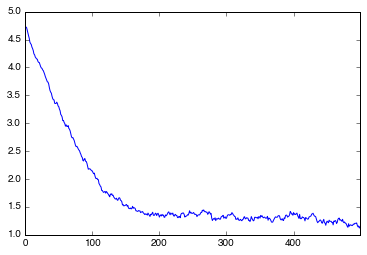

In [27]:
get_z_position(s, 'protein').plot()

This simple measurement resolves the transition. Let's now get all of these serially, and see how long it takes.

In [50]:
%%time
z_com = dict()
for sim in b:
    print "\r{}".format(sim.name), 
    z_com[sim.name] = get_z_position(sim, 'protein')

NapA_S1_i2o_9CPU times: user 49.3 s, sys: 6.64 s, total: 55.9 s
Wall time: 56.3 s



Pretty slow. We could do basically the same thing using the ``Bundle.map`` method, but we could do it in parallel on this machine using the ``multiprocessing`` module internally:

In [28]:
%time z_com_map = b.map(get_z_position, atomsel='protein', processes=8)

CPU times: user 62.8 ms, sys: 64.1 ms, total: 127 ms
Wall time: 6.53 s


Which is, predictably, about 8 times faster. But if this required more time to bake, with perhaps more than just 50 simulations, we wouldn't want to tie up our notebook session waiting for this to finish. We could instead use our ``distributed`` workers.

In [29]:
z_com_dist = ex.map(get_z_position, b, atomsel='protein')
progress(z_com_dist)

A good deal longer; there's some overhead to divvying out jobs to other machines, and the trajectories still have to all get pulled through the network. What if we submit another job of 8 workers to the queue?

```
qsub -b y -V dworker --nprocs 8 --nthreads 1 chipbacca:8786
```

In [32]:
ex

<Executor: scheduler=chipbacca:8786 workers=16 threads=16>

In [33]:
z_com_dist = ex.map(get_z_position, b, atomsel='protein')
progress(z_com_dist)

Still pretty long. An important consideration when deciding how many workers to have at once is to remember that if they're iterating through trajectories with MDAnalysis they will all be hammering the same NFS filesystem, and probably the same fileserver. The bottleneck can very quickly become I/O. So, less is often more. 

Tasks that take minutes as opposed to seconds are also better candidates for this kind of parallelism, since for tiny tasks the overhead of scheduling and passing the information (pickling the function, inputs) through the network can be much greater than the time required for the task itself.

Regardless, a big plus is that we can continue working in our Python session while these tasks bake; we don't have to wait to keep working, and we could keep adding tasks through the ``Executor`` and let the scheduler do the work of making them happen.